<a href="https://colab.research.google.com/github/trvslhlt/ift_6390_machine_learning/blob/learning-problem/exercises/01_learning_problem/examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Problem

Exercises from [course notes](https://pierrelucbacon.com/mlbook/learning-problem/#exercices)

**Run all cells to verify your setup.**

In [ ]:
# ==============================================================================
# Environment Setup - Run this cell first!
# ==============================================================================
# This cell handles both local and Google Colab environments.
# Copy this cell to the start of every notebook.

import sys
from pathlib import Path

IN_COLAB = "google.colab" in sys.modules

if IN_COLAB:
    import subprocess

    REPO_URL = "https://github.com/trvslhlt/ift_6390_machine_learning.git"
    REPO_PATH = Path("/content/ift_6390_machine_learning")

    if REPO_PATH.exists():
        print("Updating repository...")
        subprocess.run(["git", "-C", str(REPO_PATH), "pull"], check=True)
    else:
        print("Cloning repository...")
        subprocess.run(["git", "clone", REPO_URL, str(REPO_PATH)], check=True)

    print("Installing dependencies...")
    %pip install -q -e {REPO_PATH}

    sys.path.insert(0, str(REPO_PATH / "src"))
    %cd {REPO_PATH}
else:
    # Local: find repo root and add src to path
    REPO_PATH = Path.cwd()
    while not (REPO_PATH / "pyproject.toml").exists() and REPO_PATH != REPO_PATH.parent:
        REPO_PATH = REPO_PATH.parent
    sys.path.insert(0, str(REPO_PATH / "src"))

print(f"\nEnvironment: {'Google Colab' if IN_COLAB else 'Local'}")
print(f"Repository: {REPO_PATH}")

Cloning repository...
Installing dependencies...
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.0 MB/s eta 0:00:00
  Building editable for ift-6390-machine-learning (pyproject.toml) ... done
/content/ift_6390_machine_learning

Environment: Google Colab
Repository: /content/ift_6390_machine_learning


In [7]:
# ==============================================================================
# Module Imports
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exercise 1: Tool Wear

Un machiniste mesure l'usure d'un outil de coupe (en mm) à différents temps de coupe (en minutes):

```python
import numpy as np

# Données d'usure d'outil (simulées selon une loi de puissance avec bruit)
time = np.array([2.0, 5.1, 8.2, 11.3, 14.4, 17.6, 20.7, 23.8, 26.9, 30.0])
wear = np.array([0.08, 0.14, 0.17, 0.21, 0.22, 0.25, 0.27, 0.28, 0.31, 0.32])
```

L'outil doit être remplacé lorsque l'usure atteint 0.4 mm.

1. **Visualisation.** Tracez les données. Quelle forme de relation observez-vous?

2. **Ajustement.** Ajustez un modèle linéaire $w(t) = at + b$ et un modèle en loi de puissance $w(t) = at^b$ aux données. Pour le second modèle, utilisez une transformation logarithmique: $\log w = \log a + b \log t$.

3. **Comparaison.** Calculez l'EQM de chaque modèle sur les données. Lequel ajuste mieux?

4. **Prédiction.** Selon chaque modèle, à quel moment l'usure atteindra-t-elle 0.4 mm? Les deux modèles donnent-ils la même réponse?

5. **Extrapolation.** Si vous n'aviez mesuré que jusqu'à $t = 15$ min, vos prédictions changeraient-elles? Discutez du risque d'extrapolation.

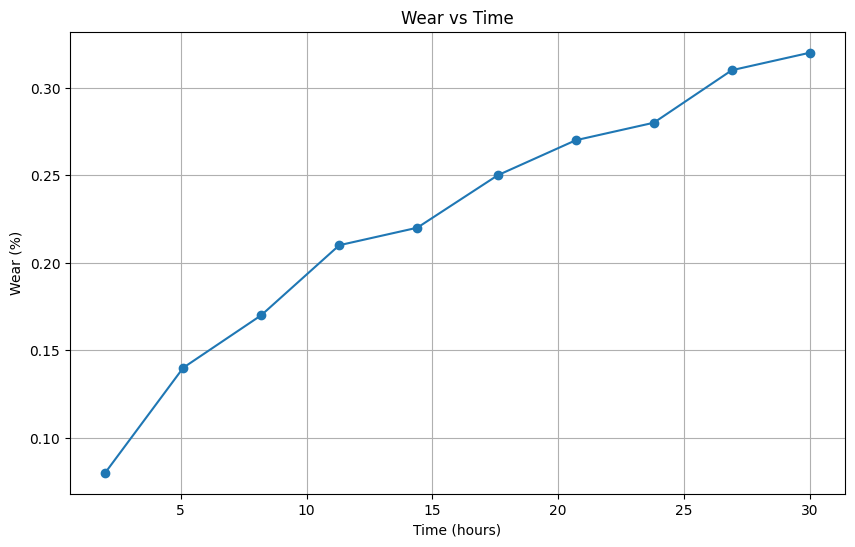

adjusted intercept for power model: 0.05899439359078829
    Model                                 Coefficients
0  Linear  [0.007995253559830133, 0.09707594304271797]
1   Power     [0.5018017243236351, -2.830312863476417]
[1.65169449 0.05899439]
    Model       MSE
0  Linear  0.000227
1   Power  0.000032
    Model  Time for 0.4 Wear (hours)
0  Linear                  37.887986
1   Power                  45.344987


In [ ]:
time = np.array([2.0, 5.1, 8.2, 11.3, 14.4, 17.6, 20.7, 23.8, 26.9, 30.0])
wear = np.array([0.08, 0.14, 0.17, 0.21, 0.22, 0.25, 0.27, 0.28, 0.31, 0.32])

# 1
plt.figure(figsize=(10, 6))
plt.plot(time, wear, marker='o')
plt.xlabel('Time (hours)')
plt.ylabel('Wear (%)')
plt.title('Wear vs Time')
plt.grid(True)
plt.show()
# the relationship is approximately linear, but could also be slightly nonlinear.

# 2
linear_coeffs = np.polyfit(time, wear, 1)
power_coeffs = np.polyfit(np.log(time), np.log(wear), 1)
print(f'adjusted intercept for power model: {np.exp(power_coeffs[1])}')
df = pd.DataFrame({
    'Model': ['Linear', 'Power'],
    'Coefficients': [linear_coeffs, power_coeffs],
})
print(df)
print(np.exp(power_coeffs))  # to interpret power model coefficients

# 3
# calculate the MSE for both models
linear_pred = np.polyval(linear_coeffs, time)
power_pred = np.exp(np.polyval(power_coeffs, np.log(time)))
linear_mse = np.mean((wear - linear_pred) ** 2)
power_mse = np.mean((wear - power_pred) ** 2)
mse_df = pd.DataFrame({
    'Model': ['Linear', 'Power'],
    'MSE': [linear_mse, power_mse],
})
print(mse_df)

# 4
# at what time do the models predict 0.4 wear?
linear_time_0_4 = (0.4 - linear_coeffs[1]) / linear_coeffs[0]
power_time_0_4 = np.exp((np.log(0.4) - power_coeffs[1]) / power_coeffs[0])
time_df = pd.DataFrame({
    'Model': ['Linear', 'Power'],
    'Time for 0.4 Wear (hours)': [linear_time_0_4, power_time_0_4],
})
print(time_df)


## Exercise 2: Risk and Empirical Risk

Soit un problème de classification binaire avec la perte 0-1. Un classificateur $f$ fait 3 erreurs sur 20 exemples d'entraînement.

1. Quel est le risque empirique de $f$ sur l'ensemble d'entraînement?

2. Peut-on en déduire le vrai risque $\mathcal{R}(f)$? Pourquoi ou pourquoi pas?

3. Si nous avions 1000 exemples de test et que $f$ fait 45 erreurs, quelle serait notre meilleure estimation du vrai risque?

In [ ]:
N = 20
errors = 3

# 1 what is the empirical risk on the training set?
R_hat_train = (errors * (0 - 1)**2) / N
print(f'Empirical risk on training set: {R_hat_train}')

# 2 can we deduce the true risk from the empirical risk?

# 1. No, we cannot deduce the true risk from the empirical risk alone. 
# The empirical risk is an estimate based on the training data, and the true risk depends on the underlying data distribution,
# which may differ from the training set.
# 2. The model f was chosen/optimized to perform well on this same data
# 3. There is potential for overlearning: f may have memorized specific aspects of the training that do not generalize
# 4. The empirical risk associated with training generally underestimates the true risk

# 3
# Estimation of the true risk is 4.5%
# the estimate here is better because we did not use the test data to select f

Empirical risk on training set: 0.15


## Exercise 3: Maximum Likelihood (NEEDS REVIEW)

Soit $\{y_1, \ldots, y_N\}$ un échantillon i.i.d. d'une distribution exponentielle de paramètre $\lambda > 0$:

$$
p(y | \lambda) = \lambda e^{-\lambda y}, \quad y \geq 0
$$

1. Écrivez la vraisemblance $\mathcal{L}(\lambda)$ et la log-vraisemblance $\log \mathcal{L}(\lambda)$.

2. Dérivez l'estimateur du maximum de vraisemblance (EMV) $\hat{\lambda}_{\text{EMV}}$.

3. Si les observations sont $y = \{0.5, 1.2, 0.8, 2.1, 0.3\}$, calculez $\hat{\lambda}_{\text{EMV}}$.

In [14]:
# NEED TO REVISIT

## Exercise 4: Loss Functions (NEEDS REVIEW)

Soit $y = 1$ (classe positive) et un score $s = f(x) = 2$.

1. Calculez la perte 0-1, la perte logistique, et la perte à charnière.

2. Répétez pour $s = -0.5$ (prédiction incorrecte).

3. Tracez les trois fonctions de perte en fonction de $y \cdot s$ pour $y \cdot s \in [-3, 3]$. Vérifiez que les pertes de substitution majorent la perte 0-1.

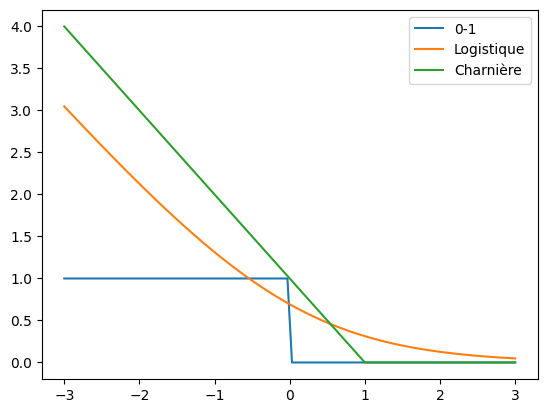

In [15]:
# 1 for y = 1, s = 2, calculate the loss 0-1, the log loss, and the hinge loss

# 2 repeat for y= 1, s = -0.5

# 3 plot the three functions as a function of s over the range -3 to 3. Verify that substitution losses increase the 0-1 loss.
margin = np.linspace(-3, 3, 100)
loss_01 = (margin < 0).astype(float)
loss_log = np.log(1 + np.exp(-margin))
loss_hinge = np.maximum(0, 1 - margin)

plt.plot(margin, loss_01, label='0-1')
plt.plot(margin, loss_log, label='Logistique')
plt.plot(margin, loss_hinge, label='Charnière')
plt.legend()

## Exercise 5: Ordinary Least Squares Differentiation ★ (NEEDS REVIEW)

Soit un problème de régression linéaire simple avec $N$ observations:

$$
y_i = \theta_0 + \theta_1 x_i + \epsilon_i, \quad i = 1, \ldots, N
$$

1. Écrivez la somme des carrés des résidus $\text{RSS}(\theta_0, \theta_1) = \sum_{i=1}^N (y_i - \theta_0 - \theta_1 x_i)^2$.

2. Calculez les dérivées partielles $\frac{\partial \text{RSS}}{\partial \theta_0}$ et $\frac{\partial \text{RSS}}{\partial \theta_1}$.

3. En posant ces dérivées égales à zéro, résolvez le système d'équations pour obtenir les estimateurs $\hat{\theta}_0$ et $\hat{\theta}_1$.

4. **Application numérique**: Pour les données $(x, y) = \{(1, 2), (2, 4), (3, 5), (4, 4), (5, 5)\}$, calculez les coefficients MCO $\hat{\theta}_0$ et $\hat{\theta}_1$, puis la prédiction pour $x = 6$.

In [22]:
# 1 write the sum for the squares of residuals (RSS)

# 2 calculate the partial derivatives wwrt theta1 and theta2

# 3 solve the system of equations to obtain the estimators theta_hat0 and theta_hat1

# 4 

X = np.array([
    [1, 2],
    [2, 4],
    [3, 5],
    [4, 4],
    [5, 5]
])
x = 6

x_bar = np.mean(X[:, 0]) # 3.0
y_bar = np.mean(X[:, 1]) # 4.0
# sum of (x_bar - xi) * (y_bar - yi)
numerator = np.sum((X[:, 0] - x_bar) * (X[:, 1] - y_bar))
# sum of (x_bar - xi)^2
denominator = np.sum((X[:, 0] - x_bar)**2)
# theta_hat_1 = numerator / denominator
theta_hat_1 = numerator / denominator
# theta_hat_0 = y_bar - theta_hat_1 * x_bar
theta_hat_0 = y_bar - theta_hat_1 * x_bar
y_hat = theta_hat_0 + theta_hat_1 * x
y_hat

np.float64(5.8)